In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
!pip install gensim

In [2]:
!pip install TextBlob   

In [97]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anapm\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [2]:
from sklearn.pipeline import Pipeline
import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import set_config
from sklearn.metrics import confusion_matrix
from textblob import TextBlob
from sklearn.linear_model import LogisticRegression

set_config(display='diagram')

In [3]:
from transformers import RemoveWords, GetTags, GetBase, Limpieza, common_tag_list, Tokenize, UnTokenize, en_embeddings_subset, GetSentenceEmbedding, subset_file

In [4]:
data = pd.read_csv(r'datasets\\dontpatronizeme_pcl.tsv', skiprows=4, sep='\t', header=None, names=['index','id_new','word_key', 'country','text','label'])
data.head()

,index,id_new,word_key,country,text,label
0,5,@@1494111,refugee,ca,""" Just like we received migrants fleeing El Sa...",0
1,6,@@9382277,in-need,in,"To bring down high blood sugar levels , insuli...",0
2,7,@@7562079,refugee,za,The European Union is making an historic mista...,0
3,8,@@23663488,hopeless,nz,""" They 're either hopeless for being beaten by...",0
4,9,@@3449225,homeless,ph,"NUEVA ERA , Ilocos Norte - No family shall be ...",1


In [5]:
map = lambda x : 0 if x < 2 else 1 
data['label'] = data['label'].apply(map)

In [6]:
data = data[~data.text.isna()]

In [8]:
X = data['text']
y = data['label']
pipe1 = Pipeline(steps=[('limpieza', Limpieza()),
                         ('tokenize', Tokenize()),
                        ('remove_stopwords', RemoveWords()),
                        ('obtener_tags', GetTags(tag_list = common_tag_list)),
                        
                         ('untokenize', UnTokenize()),
                         ('word2vec', GetSentenceEmbedding(replace= True)),
                         ('svm', SVC())
                        ])
res = pipe1.fit(X,y)

#Naive bayes cuando hagamos stemming, 

c:\Users\anapm\Documents\GitHub\Patronizing_and_Condescending_Language_Detection\transformers\limpieza.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  return pd.Series(X).str.replace(" n\'t", "n\'t") \
c:\Users\anapm\Documents\GitHub\Patronizing_and_Condescending_Language_Detection\transformers\limpieza.py:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  return pd.Series(X).str.replace(" n\'t", "n\'t") \


Series([], Name: text, dtype: object)


In [9]:
res

KeyboardInterrupt: 

In [100]:
X_train , X_test, y_train, y_test = train_test_split(X,y)

In [101]:
clf = pipe1.fit(X_train,y_train)

c:\Users\anapm\Documents\GitHub\Patronizing_and_Condescending_Language_Detection\transformers\limpieza.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  return pd.Series(X).str.replace(" n\'t", "n\'t") \
c:\Users\anapm\Documents\GitHub\Patronizing_and_Condescending_Language_Detection\transformers\limpieza.py:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  return pd.Series(X).str.replace(" n\'t", "n\'t") \


Series([], Name: text, dtype: object)


In [102]:
labels = clf.predict(X_test)

c:\Users\anapm\Documents\GitHub\Patronizing_and_Condescending_Language_Detection\transformers\limpieza.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  return pd.Series(X).str.replace(" n\'t", "n\'t") \
c:\Users\anapm\Documents\GitHub\Patronizing_and_Condescending_Language_Detection\transformers\limpieza.py:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  return pd.Series(X).str.replace(" n\'t", "n\'t") \


Series([], Name: text, dtype: object)


In [103]:
report = classification_report(y_test, labels)
print(report)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2363
           1       0.00      0.00      0.00       253

    accuracy                           0.90      2616
   macro avg       0.45      0.50      0.47      2616
weighted avg       0.82      0.90      0.86      2616



C:\Users\anapm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anapm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anapm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
report = classification_report(y_test, labels)
print(report)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2378
           1       0.00      0.00      0.00       238

    accuracy                           0.91      2616
   macro avg       0.45      0.50      0.48      2616
weighted avg       0.83      0.91      0.87      2616



C:\Users\anapm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anapm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anapm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
confusion_matrix(y_test, labels)

array([[2377,    2],
       [ 236,    1]], dtype=int64)

In [27]:
sum(labels)

3

In [30]:
2377/(2377+236)

0.9096823574435515

In [41]:
X = data['text']
y = data['label']


In [24]:
def limpiar_datos( X):
        return pd.Series(X).str.replace(" n\'t", "n\'t") \
               .str.replace(" \'re", "\'re") \
               .str.replace(" 's", "'s") \
               .str.replace("\([ A-Za-z%]+\)", "") \
               .str.replace("--", "") \
               .str.replace("<h>", "") \
               .str.replace(" \? s ", "'s") \
               .str.replace(" (@|#)\w+ ", " ") \
               .str.replace("\\", " ") \
               .str.replace("  +", " ")

In [25]:
X = limpiar_datos(X)

<ipython-input-24-2f9c6bdaebf2>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  return pd.Series(X).str.replace(" n\'t", "n\'t") \
<ipython-input-24-2f9c6bdaebf2>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  return pd.Series(X).str.replace(" n\'t", "n\'t") \


In [43]:
def sentimiento(X,Y):
    sent_pol = X.apply(lambda line: TextBlob(line).sentiment.polarity)
    sent_sub = X.apply(lambda line: TextBlob(line).sentiment.subjectivity)
    return pd.DataFrame([X,sent_pol,sent_sub, Y]).T


In [45]:
data_sentimiento = sentimiento(X,y)

In [46]:
data_sentimiento.head()

,text,text,text,label
0,""" Just like we received migrants fleeing El Sa...",0.0375,0.2875,0
1,"To bring down high blood sugar levels , insuli...",0.151111,0.357222,0
2,The European Union is making an historic mista...,0.2,0.32,0
3,""" They 're either hopeless for being beaten by...",0.133333,0.416667,0
4,"NUEVA ERA , Ilocos Norte - No family shall be ...",0.0,0.0,0


In [47]:
data_sentimiento.columns = ['text','polarity','subjectivity', 'label']

<AxesSubplot:ylabel='Density'>

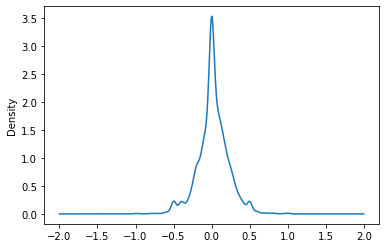

In [66]:
data_sentimiento.polarity.plot.kde()

In [67]:
len(data_sentimiento[data_sentimiento['polarity'] >= 0])

6707

In [68]:
len(data_sentimiento[data_sentimiento['polarity'] <= 0])

5463

<AxesSubplot:>

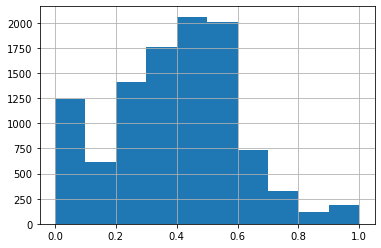

In [69]:
data_sentimiento.subjectivity.hist()

In [70]:
data_label_cond = data_sentimiento[data_sentimiento['label'] == 1]
data_label_cond

,text,polarity,subjectivity,label
28,Arshad said that besides learning many new asp...,0.007273,0.390909,1
29,Fast food employee who fed disabled man become...,0.0,0.45,1
37,Vanessa had feelings of hopelessness in her fi...,0.0,1.0,1
72,"In September , Major Nottle set off on foot fr...",0.0625,0.5,1
78,The demographics of Pakistan and India are ver...,0.076042,0.587917,1
...,...,...,...,...
10440,More than 150 volunteers spent the night in ' ...,0.2,0.3,1
10449,""" We are challenged , I suggest , to turn this...",-0.5,0.5,1
10462,""" She has one huge platform , and information ...",0.275,0.65,1
10463,""" Anja Ringgren Loven I ca n't find a word to ...",0.575,0.6,1


<AxesSubplot:>

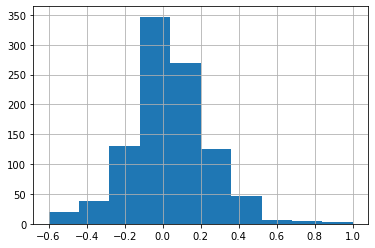

In [71]:
data_label_cond.polarity.hist()

In [72]:
len(data_label_cond[data_label_cond['polarity'] >= 0])

651

In [73]:
len(data_label_cond[data_label_cond['polarity'] <= 0])

484

<AxesSubplot:ylabel='Density'>

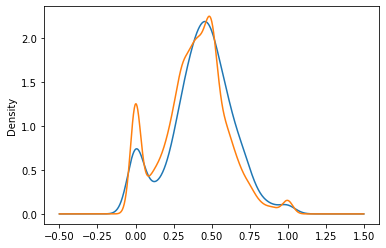

In [85]:
    data_label_cond['subjectivity'].plot.kde()
    data_label_sin.subjectivity.plot.kde()

<AxesSubplot:ylabel='Density'>

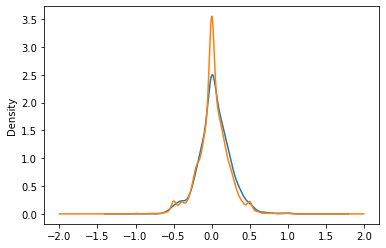

In [86]:
    data_label_cond['polarity'].plot.kde()
    data_label_sin.polarity.plot.kde()

<AxesSubplot:xlabel='polarity', ylabel='subjectivity'>

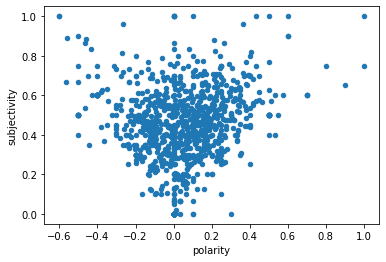

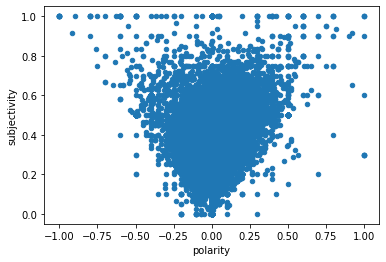

In [94]:
data_label_cond.plot.scatter(x= 'polarity', y = 'subjectivity')
data_label_sin.plot.scatter(x= 'polarity', y = 'subjectivity')